In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score

import seaborn as sns
import matplotlib. pyplot as plt
%matplotlib inline
sns.set(style="ticks")

# funcs
from funcs import *

# sklearn.ensemble
from sklearn.ensemble import *

from sklearn.metrics import *

# Dataset

In [2]:
california = fetch_california_housing()
california_df = pd.DataFrame(data=np.c_[california['data'], california['target']], columns=california['feature_names'] + ['target'])
california_x = california.data
california_y = california.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# train_test_split

In [3]:
california_x_train, california_x_test, california_y_train, california_y_test = train_test_split(california.data, california.target, test_size=0.3, random_state=1)
california_x_train.shape, california_x_test.shape

((14448, 8), (6192, 8))

# BaggingRegressor

In [4]:
br = BaggingRegressor(n_estimators=5, random_state=10)
br.fit(california_x_train, california_y_train)

BaggingRegressor(n_estimators=5, random_state=10)

# AdaBoostRegressor

In [5]:
adb = AdaBoostRegressor(n_estimators=5, random_state=10)
adb.fit(california_x_train, california_y_train)

AdaBoostRegressor(n_estimators=5, random_state=10)

# ExtraTreesRegressor

In [6]:
ext = ExtraTreesRegressor(n_estimators=5, random_state=10)
ext.fit(california_x_train, california_y_train)

ExtraTreesRegressor(n_estimators=5, random_state=10)

# RandomForestRegressor

In [7]:
rfr = RandomForestRegressor(n_estimators=5, random_state=10)
rfr.fit(california_x_train, california_y_train)

RandomForestRegressor(n_estimators=5, random_state=10)

# GradientBoostingRegressor

In [8]:
gbr = GradientBoostingRegressor(n_estimators=5, random_state=10)
gbr.fit(california_x_train, california_y_train)

GradientBoostingRegressor(n_estimators=5, random_state=10)

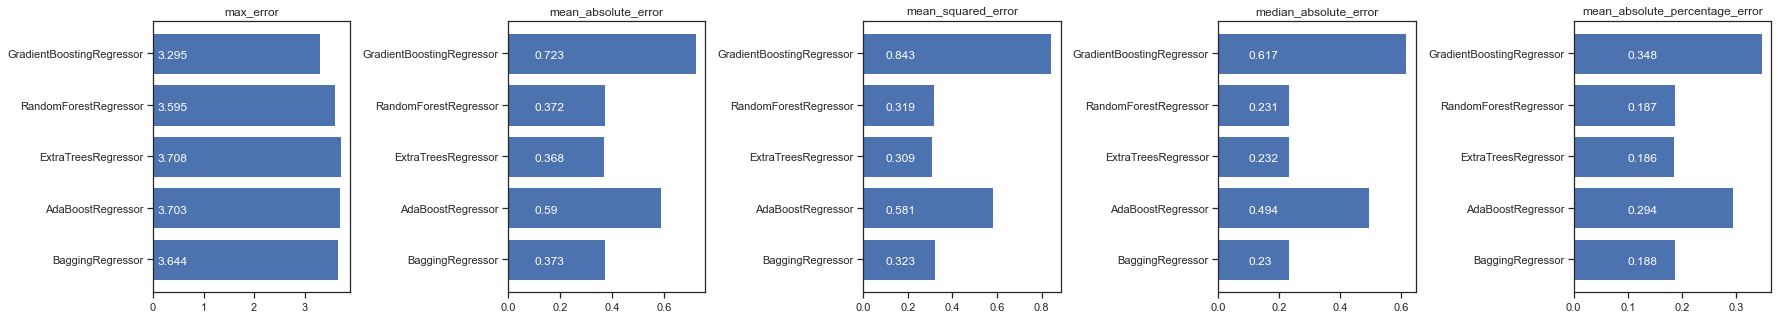

In [13]:
models = [br, adb, ext, rfr, gbr]
metrics = [max_error, mean_absolute_error, mean_squared_error, median_absolute_error, mean_absolute_percentage_error]
ENSEMBLES(models, metrics, california_x_test, california_y_test, 5, 0.8)